In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [2]:
dataset = pd.read_csv('Google_Stock_Price_Train.csv',index_col="Date",parse_dates=True)


In [3]:
dataset.head()


,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
dataset.isna().any()

Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 5 columns):
Open      1258 non-null float64
High      1258 non-null float64
Low       1258 non-null float64
Close     1258 non-null object
Volume    1258 non-null object
dtypes: float64(3), object(2)
memory usage: 59.0+ KB


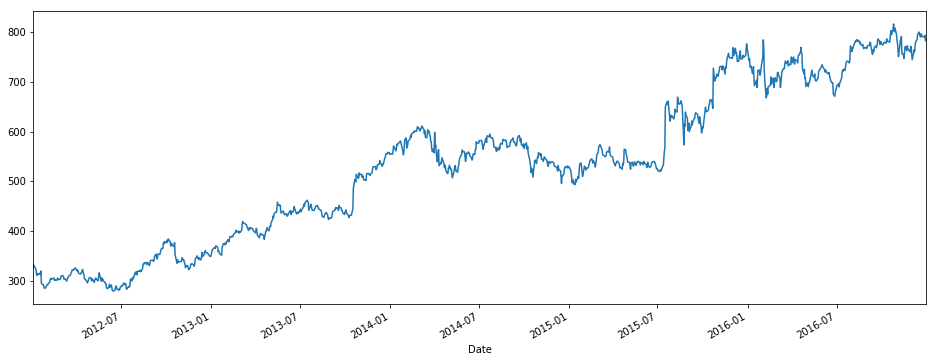

In [6]:
dataset['Open'].plot(figsize=(16,6))

In [7]:
# convert column "a" of a DataFrame
dataset["Close"] = dataset["Close"].str.replace(',', '').astype(float)


In [8]:
dataset["Volume"] = dataset["Volume"].str.replace(',', '').astype(float)

In [9]:
# 7 day rolling mean
dataset.rolling(7).mean().head(20)

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN
2012-01-04,NaN,NaN,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN,NaN,NaN
2012-01-06,NaN,NaN,NaN,NaN,NaN
2012-01-09,NaN,NaN,NaN,NaN,NaN
2012-01-10,NaN,NaN,NaN,NaN,NaN
2012-01-11,323.002857,325.392857,318.682857,643.132857,7.208100e+06
2012-01-12,321.457143,322.882857,316.841429,638.037143,6.691514e+06
2012-01-13,318.698571,319.801429,314.025714,631.870000,6.531857e+06


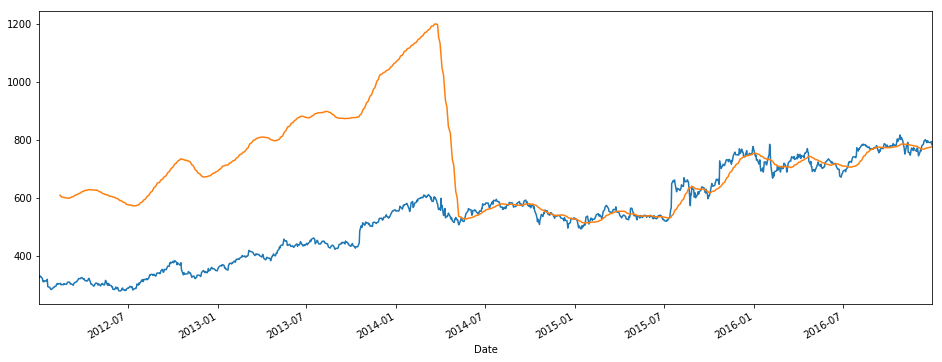

In [10]:
dataset['Open'].plot(figsize=(16,6))
dataset.rolling(window=30).mean()['Close'].plot()

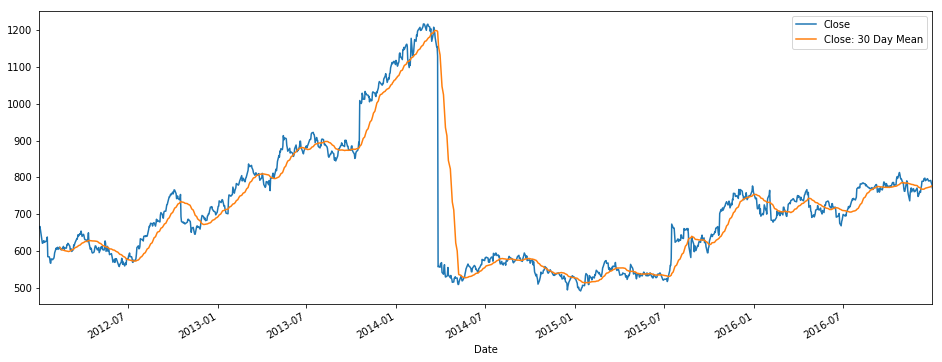

In [11]:
dataset['Close: 30 Day Mean'] = dataset['Close'].rolling(window=30).mean()
dataset[['Close','Close: 30 Day Mean']].plot(figsize=(16,6))

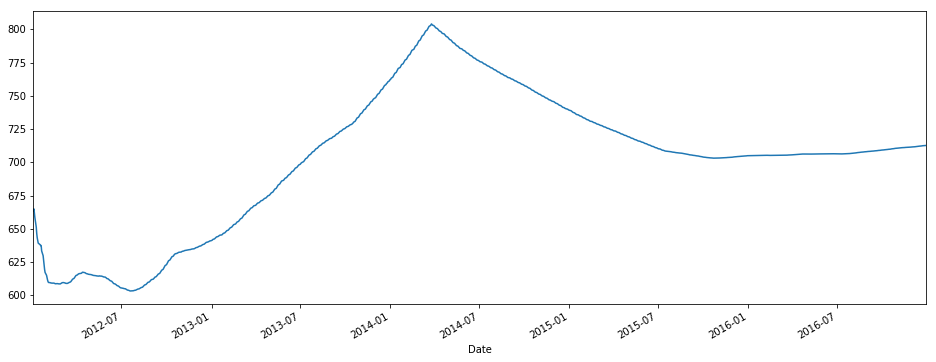

In [12]:
# Optional specify a minimum number of periods
dataset['Close'].expanding(min_periods=1).mean().plot(figsize=(16,6))

In [13]:
training_set=dataset['Open']
training_set=pd.DataFrame(training_set)


In [14]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [15]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [16]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout



Using TensorFlow backend.


In [17]:
# Initialising the RNN
regressor = Sequential()



In [18]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))



In [19]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)


Epoch 1/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0566
Epoch 2/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0071
Epoch 3/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0053
Epoch 4/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0059
Epoch 5/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0047
Epoch 6/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0049
Epoch 7/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0043
Epoch 8/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0044
Epoch 9/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0047
Epoch 10/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0042
Epoch 11/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0037
Epoch 12/100
1198/1198 [==============================] - 6s 5ms/step - l

1198/1198 [==============================] - 6s 5ms/step - loss: 0.0015
Epoch 98/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0015
Epoch 99/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0015
Epoch 100/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0015


In [29]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test4.csv',index_col="Date",parse_dates=True)

dataset.iloc[-32:,1:2]

In [113]:
X_train

,Open,High,Low,Close,Volume,Close: 30 Day Mean
Date,,,,,,
2012-01-03,325.25,332.83,324.97,663.59,7380500.0,NaN
2012-01-04,331.27,333.87,329.08,666.45,5749400.0,NaN
2012-01-05,329.83,330.75,326.89,657.21,6590300.0,NaN
2012-01-06,328.34,328.77,323.68,648.24,5405900.0,NaN
2012-01-09,322.04,322.29,309.46,620.76,11688800.0,NaN


In [163]:
test_size=5
p_size=20
real=[]
predict=[]

for jj in range (test_size):
    start=-(test_size*p_size-(jj-1)*p_size)-1
    end=-(test_size*p_size-(jj)*p_size)-1
    dataset_test=dataset.iloc[start:end,:]
    
    real_stock_price = dataset_test.iloc[:, 3:4].values
   # dataset_test["Volume"] = dataset_test["Volume"].str.replace(',', '').astype(float)
    test_set=dataset_test['Open']
    test_set=pd.DataFrame(test_set)
    # Getting the predicted stock price of 2017
    dataset_total = pd.concat((dataset['Open'], dataset_test['Open']), axis = 0)
    inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
    inputs = inputs.reshape(-1,1)
    inputs = sc.transform(inputs)
    X_test = []
    for i in range(60, p_size+60):
        X_test.append(inputs[i-60:i, 0])
        
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    predicted_stock_price = regressor.predict(X_test)
    predicted_stock_price = sc.inverse_transform(predicted_stock_price)
    #predicted_stock_price()
    real=np.append(real,real_stock_price)
    predict=np.append(predict,predicted_stock_price)
    #lastp=real_stock_price(-1)
predicted_stock_price=pd.DataFrame(predict)    

In [151]:
predicted_stock_price[(-2,0)]

759.0983

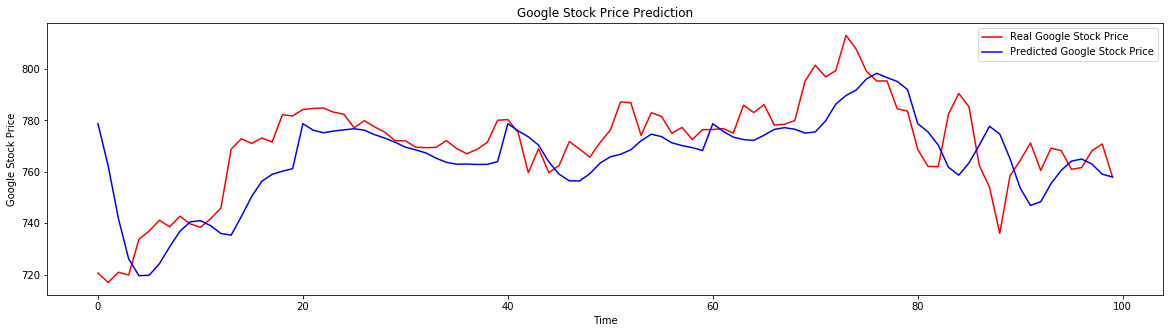

In [164]:
#j=[20,40,60,80,100,120,140]
# Visualising the results
plt.figure(figsize=(20,5))
plt.plot(real, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
#for i in j:
#    plt.axvline(x=i)
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()
